In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
path = '../data/rmsd_between_template_docked_mcs'
to_concat = []

for uniprot_id in os.listdir(path):
    to_concat += [pd.read_csv(path+'/'+uniprot_id)]
    to_concat[-1]['uniprot_id'] = uniprot_id.split('.')[0]

rmsd_between_template_docked_mcs = pd.concat(to_concat).reset_index(drop=True)

In [3]:
# save as .csv file
rmsd_between_template_docked_mcs.to_csv('../data/rmsd_between_template_docked_mcs.csv',
                                        index=False)

In [4]:
# Total size:
rmsd_between_template_docked_mcs.shape

(79015, 5)

In [5]:
# Rmsd less than 2 A
rmsd_between_template_docked_mcs.loc[rmsd_between_template_docked_mcs['rmsd']<2].shape

(47196, 5)

In [6]:
# Rmsd less than 1.5 A
rmsd_between_template_docked_mcs.loc[rmsd_between_template_docked_mcs['rmsd']<1.5].shape

(40024, 5)

In [7]:
# Rmsd less than 1 A
rmsd_between_template_docked_mcs.loc[rmsd_between_template_docked_mcs['rmsd']<1].shape

(28439, 5)

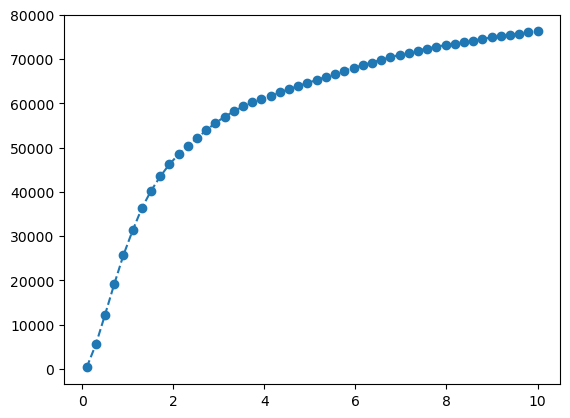

In [12]:
from matplotlib import pyplot as plt

size = [rmsd_between_template_docked_mcs.loc[rmsd_between_template_docked_mcs['rmsd']<limit].shape[0]
        for limit in np.linspace(0.1,10,50)]
plt.style.use('default')
plt.plot(np.linspace(0.1,10,50),size,'o--')
plt.show()